In [1]:
import import_ipynb
from preprocessor_eng import Preprocessor_eng
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from string import punctuation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, BatchNormalization, LSTM, GRU, Bidirectional, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt

importing Jupyter notebook from preprocessor_eng.ipynb


In [2]:
data = pd.read_csv('spam.csv', encoding = 'latin1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
data = data.drop(labels = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
st = set(stopwords.words('english'))
p = list(punctuation)
st.update(p)

In [5]:
ps = Preprocessor_eng(data, 'v2', st)
ps.preprocessor('v2', remove_stopwords = True)
t_x, v_x, tt_x, t_y, v_y, tt_y, total_word_num = ps.data_classification('v1', isstr = True, isbin = True)

<string>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:30: FutureWarning: The default value of regex will change from True to False in a future version.
<string>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:31: FutureWarning: The default value of regex will change from True to False in a future version.
<string>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [6]:
t_x.shape, v_x.shape, tt_x.shape, t_y.shape, v_y.shape, tt_y.shape

((2841, 57), (708, 57), (1519, 57), (2841,), (708,), (1519,))

In [7]:
batch_size = 256
max_sentence_num = 57
embedding_len = 128
neuron_num = 128
d_out = 0.5
lr = 0.001
ec = 50

In [8]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, restore_best_weights = True)
ck1 = ModelCheckpoint('best_em1.h5', monitor = 'val_acc', mode = 'max', save_best_only = True)
ck2 = ModelCheckpoint('best_em2.h5', monitor = 'val_acc', mode = 'max', save_best_only = True)
ck3 = ModelCheckpoint('best_em3.h5', monitor = 'val_acc', mode = 'max', save_best_only = True)
ck4 = ModelCheckpoint('best_em4.h5', monitor = 'val_acc', mode = 'max', save_best_only = True)

In [9]:
m1 = Sequential()
m1.add(Embedding(total_word_num, embedding_len, input_length = max_sentence_num))
m1.add(SimpleRNN(neuron_num, dropout = d_out, return_sequences = True))
m1.add(SimpleRNN(neuron_num, dropout = d_out))
m1.add(Dense(neuron_num, activation = 'relu'))
m1.add(Dropout(d_out))
m1.add(BatchNormalization())
m1.add(Dense(neuron_num // 2, activation = 'relu'))
m1.add(Dropout(d_out))
m1.add(BatchNormalization())
m1.add(Dense(1, activation = 'sigmoid'))
m1.compile(optimizer = Adam(lr), loss = tf.losses.BinaryCrossentropy(), metrics = ['acc'])

In [10]:
hy1 = m1.fit(t_x, t_y, epochs = ec, batch_size = batch_size, validation_data = (v_x, v_y), callbacks = [ck1, es])

Epoch 1/50
12/12 [==============================] - 5s 226ms/step - loss: 0.8101 - acc: 0.5438 - val_loss: 0.9900 - val_acc: 0.1314
Epoch 2/50
12/12 [==============================] - 2s 183ms/step - loss: 0.7121 - acc: 0.6350 - val_loss: 0.4937 - val_acc: 0.8573
Epoch 3/50
12/12 [==============================] - 2s 172ms/step - loss: 0.6343 - acc: 0.6807 - val_loss: 0.3914 - val_acc: 0.8729
Epoch 4/50
12/12 [==============================] - 2s 186ms/step - loss: 0.5437 - acc: 0.7501 - val_loss: 0.3345 - val_acc: 0.8898
Epoch 5/50
12/12 [==============================] - 2s 196ms/step - loss: 0.4142 - acc: 0.8508 - val_loss: 0.2379 - val_acc: 0.9449
Epoch 6/50
12/12 [==============================] - 2s 187ms/step - loss: 0.3281 - acc: 0.9173 - val_loss: 0.2882 - val_acc: 0.9011
Epoch 7/50
12/12 [==============================] - 2s 188ms/step - loss: 0.2972 - acc: 0.9345 - val_loss: 0.1870 - val_acc: 0.9548
Epoch 8/50
12/12 [==============================] - 3s 210ms/step - loss: 0.

In [11]:
m2 = Sequential()
m2.add(Embedding(total_word_num, embedding_len, input_length = max_sentence_num))
m2.add(LSTM(neuron_num, dropout = d_out, return_sequences = True))
m2.add(LSTM(neuron_num, dropout = d_out))
m2.add(Dense(neuron_num, activation = 'relu'))
m2.add(Dropout(d_out))
m2.add(BatchNormalization())
m2.add(Dense(neuron_num // 2, activation = 'relu'))
m2.add(Dropout(d_out))
m2.add(BatchNormalization())
m2.add(Dense(1, activation = 'sigmoid'))
m2.compile(optimizer = Adam(lr), loss = tf.losses.BinaryCrossentropy(), metrics = ['acc'])

In [12]:
hy2 = m2.fit(t_x, t_y, epochs = ec, batch_size = batch_size, validation_data = (v_x, v_y), callbacks = [ck2, es])

Epoch 1/50
12/12 [==============================] - 11s 612ms/step - loss: 0.8021 - acc: 0.5681 - val_loss: 0.6221 - val_acc: 0.8686
Epoch 2/50
12/12 [==============================] - 6s 531ms/step - loss: 0.6650 - acc: 0.6382 - val_loss: 0.5830 - val_acc: 0.8686
Epoch 3/50
12/12 [==============================] - 6s 473ms/step - loss: 0.4523 - acc: 0.7902 - val_loss: 0.5295 - val_acc: 0.8729
Epoch 4/50
12/12 [==============================] - 6s 482ms/step - loss: 0.3168 - acc: 0.9102 - val_loss: 0.4629 - val_acc: 0.9181
Epoch 5/50
12/12 [==============================] - 6s 483ms/step - loss: 0.2282 - acc: 0.9606 - val_loss: 0.4117 - val_acc: 0.9153
Epoch 6/50
12/12 [==============================] - 6s 497ms/step - loss: 0.1834 - acc: 0.9810 - val_loss: 0.3693 - val_acc: 0.9237
Epoch 7/50
12/12 [==============================] - 6s 489ms/step - loss: 0.1553 - acc: 0.9824 - val_loss: 0.3327 - val_acc: 0.9336
Epoch 8/50
12/12 [==============================] - 6s 508ms/step - loss: 0

In [13]:
m3 = Sequential()
m3.add(Embedding(total_word_num, embedding_len, input_length = max_sentence_num))
m3.add(GRU(neuron_num, dropout = d_out, return_sequences = True))
m3.add(GRU(neuron_num, dropout = d_out))
m3.add(Dense(neuron_num, activation = 'relu'))
m3.add(Dropout(d_out))
m3.add(BatchNormalization())
m3.add(Dense(neuron_num // 2, activation = 'relu'))
m3.add(Dropout(d_out))
m3.add(BatchNormalization())
m3.add(Dense(1, activation = 'sigmoid'))
m3.compile(optimizer = Adam(lr), loss = tf.losses.BinaryCrossentropy(), metrics = ['acc'])

In [14]:
hy3 = m3.fit(t_x, t_y, epochs = ec, batch_size = batch_size, validation_data = (v_x, v_y), callbacks = [ck3, es])

Epoch 1/50
12/12 [==============================] - 9s 472ms/step - loss: 0.7727 - acc: 0.5822 - val_loss: 0.6310 - val_acc: 0.8686
Epoch 2/50
12/12 [==============================] - 5s 417ms/step - loss: 0.5379 - acc: 0.7557 - val_loss: 0.5545 - val_acc: 0.8757
Epoch 3/50
12/12 [==============================] - 6s 509ms/step - loss: 0.3409 - acc: 0.9127 - val_loss: 0.4563 - val_acc: 0.9421
Epoch 4/50
12/12 [==============================] - 5s 435ms/step - loss: 0.2342 - acc: 0.9740 - val_loss: 0.3850 - val_acc: 0.9492
Epoch 5/50
12/12 [==============================] - 6s 472ms/step - loss: 0.1834 - acc: 0.9824 - val_loss: 0.3191 - val_acc: 0.9562
Epoch 6/50
12/12 [==============================] - 6s 465ms/step - loss: 0.1589 - acc: 0.9754 - val_loss: 0.2982 - val_acc: 0.9463
Epoch 7/50
12/12 [==============================] - 5s 456ms/step - loss: 0.1376 - acc: 0.9838 - val_loss: 0.2637 - val_acc: 0.9477
Epoch 8/50
12/12 [==============================] - 6s 471ms/step - loss: 0.

In [15]:
m4 = Sequential()
m4.add(Embedding(total_word_num, embedding_len, input_length = max_sentence_num))
m4.add(Bidirectional(LSTM(neuron_num, dropout = d_out, return_sequences = True)))
m4.add(Bidirectional(LSTM(neuron_num // 2, dropout = d_out)))
m4.add(Dense(neuron_num, activation = 'relu'))
m4.add(Dropout(d_out))
m4.add(BatchNormalization())
m4.add(Dense(neuron_num // 2, activation = 'relu'))
m4.add(Dropout(d_out))
m4.add(BatchNormalization())
m4.add(Dense(1, activation = 'sigmoid'))
m4.compile(optimizer = Adam(lr), loss = tf.losses.BinaryCrossentropy(), metrics = ['acc'])

In [16]:
hy4 = m4.fit(t_x, t_y, epochs = ec, batch_size = batch_size, validation_data = (v_x, v_y), callbacks = [ck4, es])

Epoch 1/50
12/12 [==============================] - 20s 1s/step - loss: 0.8203 - acc: 0.5382 - val_loss: 0.5900 - val_acc: 0.8686
Epoch 2/50
12/12 [==============================] - 15s 1s/step - loss: 0.7266 - acc: 0.6001 - val_loss: 0.5408 - val_acc: 0.8686
Epoch 3/50
12/12 [==============================] - 14s 1s/step - loss: 0.6092 - acc: 0.6906 - val_loss: 0.5155 - val_acc: 0.8955
Epoch 4/50
12/12 [==============================] - 14s 1s/step - loss: 0.4327 - acc: 0.8015 - val_loss: 0.4964 - val_acc: 0.9393
Epoch 5/50
12/12 [==============================] - 14s 1s/step - loss: 0.3068 - acc: 0.9032 - val_loss: 0.4350 - val_acc: 0.9463
Epoch 6/50
12/12 [==============================] - 14s 1s/step - loss: 0.2343 - acc: 0.9560 - val_loss: 0.3793 - val_acc: 0.9661
Epoch 7/50
12/12 [==============================] - 14s 1s/step - loss: 0.1805 - acc: 0.9782 - val_loss: 0.3276 - val_acc: 0.9746
Epoch 8/50
12/12 [==============================] - 14s 1s/step - loss: 0.1444 - acc: 0.98

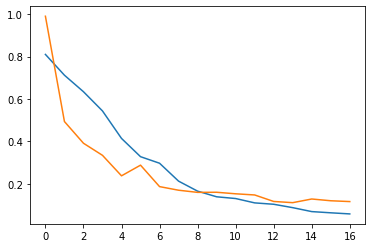

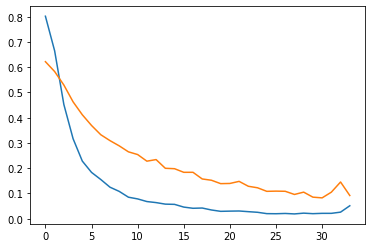

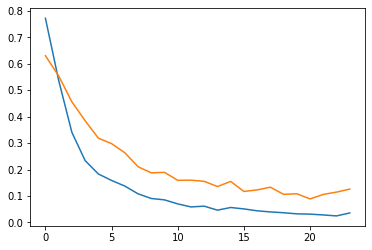

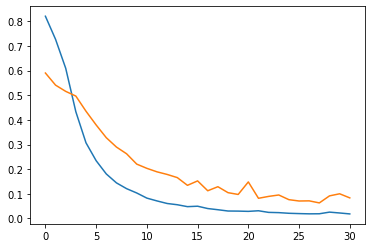

In [17]:
plt.plot(hy1.history['loss'])
plt.plot(hy1.history['val_loss'])
plt.show()

plt.plot(hy2.history['loss'])
plt.plot(hy2.history['val_loss'])
plt.show()

plt.plot(hy3.history['loss'])
plt.plot(hy3.history['val_loss'])
plt.show()

plt.plot(hy4.history['loss'])
plt.plot(hy4.history['val_loss'])
plt.show()

In [18]:
m1.evaluate(tt_x, tt_y), m2.evaluate(tt_x, tt_y), m3.evaluate(tt_x, tt_y), m4.evaluate(tt_x, tt_y)

48/48 [==============================] - 3s 57ms/step - loss: 0.1067 - acc: 0.9750: 0s - loss: 0.0899 - a


([0.09437777101993561, 0.9782751798629761],
 [0.09426720440387726, 0.9789335131645203],
 [0.09195608645677567, 0.9789335131645203],
 [0.1067369356751442, 0.9749835133552551])